<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/talkingData_CatFeature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Last amended: 1st March, 2021
# Myfolder: C:\Users\Administrator\OneDrive\Documents\talkingdata
# Ref: https://www.kaggle.com/nanomathias/feature-engineering-importance-testing
#      https://www.kaggle.com/nuhsikander/lgbm-new-features-corrected
#      https://github.com/harnalashok/h2o
#
# Data source: https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection
# Objectives:
#           i)    Categorical feature engineering
#                 using aggregation

#How to create new features from categorical features
>Categorical features can be encoded either using OneHotEncoding technique or using Hashing technique. But if the categorical features have bery large number of levels, then in both cases very large number of features will be generated.  
Another option is to develop new features by transforming each cat-feature to one numeric column. There can be many ways to do this and, therefore, one cat-feature can get transformed to many numeric features. But, when we do this, we have a control over how many numeric columns we create and can also examine which are more important. This example demonstartes feature creation using this option. 

##Mounting Google Drive and calling libraries

In [6]:
# 1.0 Mount your google drive 
#      so that you can access data files 
#      on your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# 1.1 Call libraries
# %reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, gc
import os,time

In [8]:
# 1.2 Display output from multiple commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# 1.3 Change folder to where TalkingData is:
#os.chdir("C:\\Users\\Administrator\\OneDrive\\Documents\\talkingdata")
path =  "/content/drive/MyDrive/Colab_data_files/talkingData/"
os.listdir(path)

['train.csv.zip', 'test.csv.zip', 'talkingData_sample.csv.zip']

## Feature Engineering
>    "*As Andy once said in the comment of a kernel(Sorry, i can't remember which kernel since i have try more than 20 until now): There is nothing to stop us from doing that. I think that makes sense because when we generate some new features using frequency,mean,var,count,unique etc. , we want to get the accurate numerical number as much as we can which is close to the hidden population distribution statistically in this 4 days , test set is also a sample of this population distribution in this 4 days, So we NEED to use train/test set together to generate the statistical features which can help us get close to the hidden population distribution. And as you can imagine, If we can use the entire train/test set to compute the features, that certainly would be more accurate to train our model.*"

>    "*A perfect algorithm might not need these features. But no algorithm is perfect so you can think of derived features as aiding/helping the classifier figure out what might be relevant to classify correctly.*"


#### Which features are of which type
Here is how the features are being treated:  
Target feature is '*is_atributed*'  

<table>
<tr>
    <th>ip</th>
    <th>app</th>
    <th>os</th> 
    <th>channel</th>
    <th>day</th>
    <th>hour</th> 
    <th>is_attributed</th>
</tr>
<tr>
    <td>categorical</td> 
    <td>categorical</td> 
    <td>categorical</td>
    <td>categorical</td> 
    <td>numeric/categorical</td> 
    <td>numeric/categorical</td>
    <td>categorical</td>
</tr>
</table>
-----------------------------------------------------------<br><br>



#### How feature engineering has been performed?<br>
A. <u>Relationship of categorical features among themselves</u>:

There is a possibility to create a huge number of features. These features naturally take very large RAM.  
>Table 1
<table>
<tr>
    <th>Sno</th>
    <th>GroupBy</th>
    <th>Operation</th>
    <th>On</th> 
    <th>Remarks</th>
</tr>
<tr>
    <td>1</td>
    <td>IP</td> 
    <td>nunique</td> 
    <td>channel</td>
    <td>Per IP, how many unique channels</td> 
</tr>
<tr>
    <td>2</td>
    <td>IP</td> 
    <td>nunique</td> 
    <td>app</td>
    <td>Per IP, how many unique app</td> 
</tr>
<tr>
    <td>3</td>
    <td>IP</td> 
    <td>nunique</td> 
    <td>device</td>
    <td>Per IP, how many unique device</td> 
</tr>
<tr>
    <td>4</td>
    <td>IP</td> 
    <td>nunique</td> 
    <td>os</td>
    <td>Per IP, how many unique os</td> 
</tr>
<tr>
    <td>5</td>
    <td>IP</td> 
    <td>cumcount</td> 
    <td>app</td>
    <td>Per IP, cumcount of app</td> 
</tr>
<tr>
    <td>6</td>
    <td>IP</td> 
    <td>cumcount</td> 
    <td>os</td>
    <td>Per IP, cumcount of os</td> 
</tr>
<tr>
    <td>7</td>
    <td>IP</td> 
    <td>count</td> 
    <td>channel</td>
    <td>Per IP, count of channel</td> 
</tr>
<tr>
    <td>8</td>
    <td>app</td> 
    <td>count</td> 
    <td>channel</td>
    <td>Per app, count of channel</td> 
</tr>
<tr>
    <td>9</td>
    <td>channel</td> 
    <td>count</td> 
    <td>app</td>
    <td>Per channel, count of app</td> 
</tr>
<tr>
    <td>10</td>
    <td>ip+app</td> 
    <td>count</td> 
    <td>channels</td>
    <td>Per ip+app, count of channels</td> 
</tr>
<tr>
    <td>11</td>
    <td>ip+app</td> 
    <td>nunique</td> 
    <td>os</td>
    <td>Per ip+app, how many unique os</td> 
</tr>
<tr>
    <td>12</td>
    <td>ip+day</td> 
    <td>nunique</td> 
    <td>hours</td>
    <td>Per ip+day how many unique hours</td> 
</tr>
<tr>
    <td>13</td>
    <td>ip+day+channel</td> 
    <td>variance</td> 
    <td>hour</td>
    <td>Per ip+day+channel variance of hour</td> 
</tr>
<tr>
    <td>14</td>
    <td>ip+day+channel</td> 
    <td>mean</td> 
    <td>hour</td>
    <td>Per ip+day+channel mean of hour</td> 
</tr>
<tr>
    <td>15</td>
    <td>ip+app+os</td> 
    <td>variance</td> 
    <td>hour</td>
    <td>Per ip+app+os variance of hour</td> 
</tr>
<tr>
    <td>16</td>
    <td>ip+app+os</td> 
    <td>count</td> 
    <td>channels</td>
    <td>Per ip+app+os count of channel</td> 
</tr>
<tr>
    <td>17</td>
    <td>ip+app+channel</td> 
    <td>variance</td> 
    <td>hour</td>
    <td>Per ip+app+channel variance of hours</td> 
</tr>
<tr>
    <td>18</td>
    <td>ip+device+os</td> 
    <td>cumcount</td> 
    <td>app</td>
    <td>Per ip+device+os cumcount of app</td> 
</tr>
<tr>
    <td>19</td>
    <td>ip+device+os</td> 
    <td>nunique</td> 
    <td>os</td>
    <td>Per ip+device+os how many unique of app</td> 
</tr>
<tr>
    <td>20</td>
    <td>ip+day+channel</td> 
    <td>variance</td> 
    <td>hour</td>
    <td>Per ip+day+channel variance of hour</td> 
</tr>
<tr>
    <td>21</td>
    <td>ip+day+hour</td> 
    <td>count</td> 
    <td>channel</td>
    <td>Per ip+day+hour count of channel</td> 
</tr>
<tr>
    <td>22</td>
    <td>ip+app+day+hour</td> 
    <td>count</td> 
    <td>channel</td>
    <td>Per ip+app+day+hour variance of hour</td> 
</tr>
</table>
-----------------------------------------------------------<br>



B. <u>Relationship of categorical features with target</u>:

We develop relationship between a feature and the target. Essentially, we are calculating probability of being 1 or 0 (in `is_attributed`) for every level ocurring in a categorical feature or a group of features. This probability is then moderated by a factor known as `confRate`. More will be the confidence in the probability if more the evidence or more the occurrences of a particular level (in a catgorical feature) among all levels.<br><br>

For example, let a categorical feature contain three levels: level-1, level-2 and level-3. Let level-1, occur in 6 rows, level-2 occur in 5-rows but level-3 occur just in 1 row. Let `np.sum(target)` for level-1 be 2 and `np.sum(target)` for level-2 be 5. Then group probability will be as shown below. But confidence in probability calculations related to level-3 feature would be very low as its probability calculations are beased on just one ocurrence of level-3. Here is an example of how it is calculated:<br>
        `probability = group.sum() / float(group.count())`<br>
        `confRate = np.log(group.count()) / np.log(constant)` <br>
To determine appropriate values for `log(constant)`, may be a graph can be drawn between `confRate` and `log(constant)`, or `probability X confRate` vs `log(constant)` and then take a decision. In fact `log(constant)` can also be treated as a *hyperparameter*.  
There is a word of caution here. Such calculations may result in *Data Leakage or leaking target information into new features. But if data is very large, the derived numerical feature may actually reflect the statistics it is intended to calculate. 

>Table 2

<table>
<tr>
    <th>cat_feature</th>
    <th>target</th>
    <th>gr. prob</th>
    <th>Conf-level</th> 
</tr>
<tr>
    <td>level-1</th>
    <td>1</td>
    <td>2/6</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-2</th>
    <td>0</td>
    <td>3/5</td>
    <td>high</td> 
</tr>
<tr>
    <td>level-1</th>
    <td>0</td>
    <td>2/6</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-1</td>
    <td>0</td>
    <td>2/6</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-2</td>
    <td>1</td>
    <td>3/5</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-1</td>
    <td>0</td>
    <td>2/6</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-2</td>
    <td>1</td>
    <td>3/5</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-2</td>
    <td>0</td>
    <td>3/5</td>
    <td>high</td> 
</tr>
<tr>
    <td>level-2</td>
    <td>1</td>
    <td>3/5</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-1</td>
    <td>0</td>
    <td>2/6</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-1</td>
    <td>1</td>
    <td>2/6</td> 
    <td>high</td>
</tr>
<tr>
    <td>level-3</td>
    <td>1</td>
    <td>1/1</td>
    <td>**LOW**</td> 
</tr>
</table>

Here is a list of features on which we perform above operations:

>Table 3

sno|grouping-feature|
-|-|
1|ip|
2|app|
3|os|
4|channel|
5|app+channel|
6|app+os|
7|app+device|
8|channel+os|
9|channel+device|
10|os+device|


##Read Data
Read either full data or sample data

### Either, Read complete file
We read here directly from the original training data file. As data is large, we sample it.

To read this data and save memory, please see this [kernel](https://www.kaggle.com/nuhsikander/lgbm-new-features-corrected)

In [10]:
# From our experience of earlier reading of data
#  we know that data types of some of the features.
#   We use those data-types leading to almost half 
#    of memory-usage
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }

print('load train...')



# 2.0 Read a fraction of data
total_lines = 184903891
read_lines = 1000000    # (10 lakh) Reduce it if less RAM

# 2.1 Read randomly 'p' fraction of files
#     Ref: https://stackoverflow.com/a/48589768

p = read_lines/total_lines  # fraction of lines to read

# 2.1.1 How to pick up random rows from hard-disk
#       without first loading the complete file in RAM
#       Toss a coin:
#           At each row, toss a biased-coin: 60%->Head, 40%->tail
#           If tail comes, select the row else not.
#           Toss a coin: random.random()
#           Head occurs if value > 0.6 else it is tail
#
#       We do not toss the coin for header row. Keep the header
start = time.time()
train = pd.read_csv(
                     path + "train.csv.zip",  # Not reading test.csv.zip
                     header=0,  # First row is header-row
                                # 'and' operator returns True if both values are True
                                #  random.random() returns values between (0,1)
                                #  No of rows skipped will be around 60% of total
                      skiprows=lambda i: (i >0 ) and (np.random.random() > p),    # (i>0) implies skip first header row
                      dtype=dtypes,
                      # We read all columns. Here are the column-names
                      #  in the sequence they occur in the train data
                      usecols=['ip','app','device','os', 'channel', 'click_time', 'attributed_time', 'is_attributed']
                    )
end = time.time()
(end-start)/60      # 3 to 4 minutes


load train...


ParserError: ignored

In [ ]:
# 2.1.2 Store sampled data to a file on 
#         Google drive for later use
pathToSave = "/root/" 
filePath = pathToSave + "talkingData_sample.csv.zip"

# 2.1.3 But first delete existing file.
#        The following will NOT work.
#          python variables are not available in shell
# ! rm -f filePath

# 2.1.4 This will work:
os.remove(filePath)

# 2.1.5 Check if deleted
os.listdir(pathToSave)
#! rm -f /root/talkingData_sample.csv.zip

In [ ]:
# 2.2 Save the sample data into VM only
start = time.time()
train.to_csv(filePath, compression = "zip", index = False)
end = time.time()
(end-start)/60     # 3 minutes

0.08405812978744506

In [ ]:
# 2.3 Check saved file 
#       and get size of saved file 
  
os.stat(filePath).st_size/1000000.0  # (305 MB)

8.745757

In [ ]:
# 2.4 Copy saved sample file from VM to Google Drive
from shutil import copyfile
pathToGoogleDrive = "/content/drive/MyDrive/Colab_data_files/talkingData/" + "talkingData_sample.csv.zip"
copyfile(filePath, pathToGoogleDrive)
print(os.stat(pathToGoogleDrive).st_size/1000000.0)  # (305 MB)

'/content/drive/MyDrive/Colab_data_files/talkingData/talkingData_sample.csv.zip'

8.745757


### Or, Read already saved sampled data from Google drive

In [11]:
# 3.0 Path to saved sample data in Google Drive
pathToSavedData = "/content/drive/MyDrive/Colab_data_files/talkingData/" + "talkingData_sample.csv.zip"

# 3.0.1 Read the sample file
start = time.time()
train = pd.read_csv(
                     pathToSavedData,
                     header=0,  # First row is header-row
                    )
end = time.time()
(end-start)/60     # 3 minutes

0.0246079683303833

##Explore data

In [12]:
# 3.1
print(train.shape)   # (39995256, 8)
train.head(3)

# 3.2
print("---dtypes----")
print(train.dtypes) # ip int64,app int64,device int64,os int64,channel int64,
                    # click_time object,attributed_time object,is_attributed int64

# 3.3 Let us see distribution of NULLS
print("---Nulls----")
print(train.isnull().sum())      # 299084 nulls in attributed_time

# 3.4 Transform 'click_time' to datetime
train['click_time'] = pd.to_datetime(train['click_time'])

(998880, 8)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,109591,3,1,19,379,2017-11-06 15:46:02,NaN,0
1,165679,3,1,23,379,2017-11-06 15:46:51,NaN,0
2,108040,3,1,8,379,2017-11-06 15:46:52,NaN,0


---dtypes----
ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object
---Nulls----
ip                      0
app                     0
device                  0
os                      0
channel                 0
click_time              0
attributed_time    996439
is_attributed           0
dtype: int64


In [13]:
# 3.5 Derive some date components
train['day']    = train['click_time'].dt.day.astype('uint8')
train['hour']   = train['click_time'].dt.hour.astype('uint8')
train['minute'] = train['click_time'].dt.minute.astype('uint8')
train['second'] = train['click_time'].dt.second.astype('uint8')
train.head(3)
train.shape   # (999280, 12)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,109591,3,1,19,379,2017-11-06 15:46:02,NaN,0,6,15,46,2
1,165679,3,1,23,379,2017-11-06 15:46:51,NaN,0,6,15,46,51
2,108040,3,1,8,379,2017-11-06 15:46:52,NaN,0,6,15,46,52


(998880, 12)

##Relationship of categorical features with target (Expts)
We first perform some experiments to learn how to go about developing relationship of categorical features with the target

### Joining elements of a list

In [14]:
# 4.0 Use join() to concatenate elements of a list
#     We use this to easily create new feature-names

# 4.1 The join() string method returns a
#      string by joining all the elements of
#       an iterable, separated by a string separator.

# 4.1.1
list1 = ['a', 'b', 'c']
tuple1 = ("a", "b", "c")
ss = "uvxyz"

# 4.1.2 Join the elements of containers now
'_'.join(list1)   # Elements of list are joint by string: a_b_c
'_'.join(tuple1)  # a_b_c
'_'.join(ss)      # u_v_x_y_z

'a_b_c'

'a_b_c'

'u_v_x_y_z'

In [15]:
# 4.2 Our lists
ATTRIBUTION_CATEGORIES = [        
    # V1 Features #
    ###############
    ['ip'], ['app'], ['device'], ['os'], ['channel'],    # 5
    
    # V2 Features #
    ###############
    ['app', 'channel'],    # name "app_channel" 
    ['app', 'os'],         # name: "app_os"
    ['app', 'device'],     # name: "app_device" 
    
    # V3 Features #
    ###############
    ['channel', 'os'],     # name: "channel_os"
    ['channel', 'device'], # name: "channel_device"
    ['os', 'device']       # name: "os_device"
]

# 4.2.1 Join elements of each contioner, one by one
#       Our new features will have these names:

feature_names = []
for elements in ATTRIBUTION_CATEGORIES:
    new_feature = '_'.join(elements)+'_confRate' 
    feature_names.append(new_feature)

print (feature_names)    

['ip_confRate', 'app_confRate', 'device_confRate', 'os_confRate', 'channel_confRate', 'app_channel_confRate', 'app_os_confRate', 'app_device_confRate', 'channel_os_confRate', 'channel_device_confRate', 'os_device_confRate']


### Grouping

In [16]:
# 4.3 groupby()

# 4.3.1 Find frequency of 'is_attributed' for
#       each unique value in column(s)

freqs = {}
cols = ['app', 'channel']

# 4.3.2 New feature name:

new_feature = '_'.join(cols)+'_confRate'    
    
# 4.3.3 Perform the groupby:

grouped = train.groupby(cols)   # For example: ['app', 'channel']
    
# 4.3.4 Each group size:

group_sizes = grouped.size()

# 4.3.5 How many groups:

print(group_sizes.shape)       # (638,)

# 4.3.5 Have a look at some groups:
group_sizes[:5]

(669,)


app  channel
0    101          11
1    13          606
     17         1252
     18           59
     24          418
dtype: int64

### Confidence rate calculation

In [17]:
# 5.0
x1 = grouped['is_attributed'].sum()         # How many are labeled as 1's per group
x1[:5]

# 5.1
x2 = grouped['is_attributed'].count()       # Size of each group. Same as group_sizes
x2[:5]

app  channel
0    101        6
1    13         0
     17         2
     18         0
     24         0
Name: is_attributed, dtype: int64

app  channel
0    101          11
1    13          606
     17         1252
     18           59
     24          418
Name: is_attributed, dtype: int64

In [18]:
# 5.2 Group-wise importance or probability
probability = x1/x2
probability[:5]

app  channel
0    101        0.545455
1    13         0.000000
     17         0.001597
     18         0.000000
     24         0.000000
Name: is_attributed, dtype: float64

In [29]:
# 5.3 Group-wise confidence in probabilites

       # Higher the total occurrences or group-size (ie group count),
        #  per-group, more the confidence in probability calculations
        #   But below certain number of counts, confidence in probability
        #    should be low. 
        #    That is confidence is proportional to counts
        #      But better use log(counts) so that after 
        #       certain threshold of high-counts, probability
        #        does not get affected by still higher counts. After all
        #         count of 10000 should be same as count of 10500. So
        #          use log(group_sizes). Further, results should
        #            be normalized by dividing by a constant (log(100000))
        #         
log_group = np.log(100000)
conf = np.log(x2.astype('float')) / log_group
conf[:5]

app  channel
0    101        0.208279
1    13         0.556495
     17         0.619521
     18         0.354170
     24         0.524235
Name: is_attributed, dtype: float64

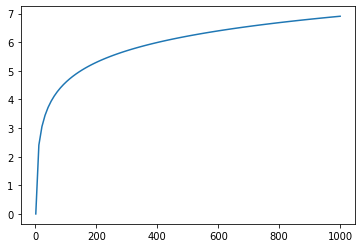

In [25]:
# 5.3.1 Plot of log(count)
#       For low values of count() it 
#        tends to be zero and for large values
#         of count() it tries to suppress importance

import matplotlib.pyplot as plt
t = np.linspace(1, 1000, 100)
_=plt.plot(t, np.log(t))



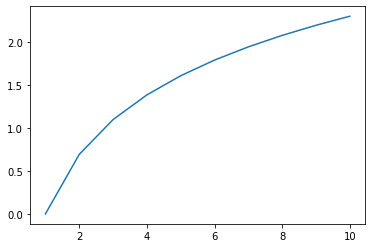

In [26]:
# 5.3.2
t = np.linspace(1, 10, 10)
_=plt.plot(t, np.log(t))

In [30]:
# 5.4 Rate calculation function
#     apply() calls this function and passes to it
#     just one group (or one dataframe subset)
#     So, 'x' is that group or DataFrame.
#     Therefore, x.sum(), is a scalar
#     so also x.count().

def rate_calculation(x):
        """Calculate the attributed rate. Scale by confidence"""
        # x.sum() is a scalar so also x.count() 
        probability = x.sum() / float(x.count())
        conf = np.min([1, np.log(x.count()) / log_group])
        return probability * conf


In [31]:
# 5.5 Here are the results
grouped['is_attributed']. \
            apply(rate_calculation). \
            reset_index()

,app,channel,is_attributed
0,0,101,0.113606
1,1,13,0.000000
2,1,17,0.000990
3,1,18,0.000000
4,1,24,0.000000
...,...,...,...
664,552,347,0.000000
665,556,347,0.000000
666,563,347,0.000000
667,567,347,0.000000


In [32]:
# 5.5 Here are the results
cols = ['app', 'channel']

# 5.6
new_feature = 'appchannelConfRate'

# 5.7
grouped['is_attributed']. \
            apply(rate_calculation). \
            reset_index(). \
            rename( 
                    index=str,
                    columns={'is_attributed': new_feature}
                   )

,app,channel,appchannelConfRate
0,0,101,0.113606
1,1,13,0.000000
2,1,17,0.000990
3,1,18,0.000000
4,1,24,0.000000
...,...,...,...
664,552,347,0.000000
665,556,347,0.000000
666,563,347,0.000000
667,567,347,0.000000


In [33]:
# 5.7 Grouping and reindexing
cols = ['app', 'channel']
new_feature = 'appchannelConfRate'
grouped['is_attributed']. \
            apply(rate_calculation). \
            reset_index(). \
            rename( 
                    index=str,
                    columns={'is_attributed': new_feature}
                   )[cols + [new_feature]]
                        

,app,channel,appchannelConfRate
0,0,101,0.113606
1,1,13,0.000000
2,1,17,0.000990
3,1,18,0.000000
4,1,24,0.000000
...,...,...,...
664,552,347,0.000000
665,556,347,0.000000
666,563,347,0.000000
667,567,347,0.000000


In [34]:
# 5.8 Merging the group back into main data
# And finally merging the above result 
#  in the train data
abc = train.merge(
                    grouped['is_attributed']. \
                    apply(rate_calculation). \
                    reset_index(). \
                         rename( 
                                index=str,
                                columns={'is_attributed': new_feature}
                                )[cols + [new_feature]],
                         on=cols,
                         how='left'
                    )

abc.head(3)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,appchannelConfRate
0,109591,3,1,19,379,2017-11-06 15:46:02,NaN,0,6,15,46,2,0.000561
1,165679,3,1,23,379,2017-11-06 15:46:51,NaN,0,6,15,46,51,0.000561
2,108040,3,1,8,379,2017-11-06 15:46:52,NaN,0,6,15,46,52,0.000561


##  Finally develop relationship of categorical features with target
We now use the above experiments to create new features. Create each new feature by multiplying `probability` with `confRate`. We define a full function to perform this. You may refer to Tables 2 and 3 above.

In [35]:
# 6.0 Now the full function
#     for many columns

# 6.1 Our lists
ATTRIBUTION_CATEGORIES = [        
    # V1 Features #
    ###############
    ['ip'], ['app'], ['device'], ['os'], ['channel'],    # 5
    
    # V2 Features #
    ###############
    ['app', 'channel'],    # name "app_channel" 
    ['app', 'os'],         # name: "app_os"
    ['app', 'device'],     # name: "app_device" 
    
    # V3 Features #
    ###############
    ['channel', 'os'],     # name: "channel_os"
    ['channel', 'device'], # name: "channel_device"
    ['os', 'device']       # name: "os_device"
]


freqs = {}

# 6.2
for cols in ATTRIBUTION_CATEGORIES:
    
    # 6.2 New feature name
    new_feature = '_'.join(cols)+'_confRate'    
    
    # 6.3 Perform the groupby
    grouped = train.groupby(cols)   # For example on: ['app', 'channel']
    
    # 6.4 Group sizes: Size of each group in pandas Series    
    group_sizes = grouped.size()

    # 6.5 Normalizer that can be a hyperparameter
    log_group = np.log(100000) # 1000 views -> 60% confidence, 100 views -> 40% confidence 

    # 6.6 Just print some information about this group
    print(">> Calculating confidence-weighted rate for: {}.\n   \
              Saving to: {}. \
              Group Max /Mean / Median / Min: {} / {} / {} / {}". \
              format( \
                      cols, new_feature, 
                      group_sizes.max(), 
                      np.round(group_sizes.mean(), 2),
                      np.round(group_sizes.median(), 2),
                      group_sizes.min()
                    )
         )
    
    # 6.7 Function to calculate probability/confRate calculations
    def rate_calculation(x):
        """Calculate the attributed rate. Scale by confidence"""

        # Higher the number of 1's in a group, higher
        # the probability of 1's.
        probability = x.sum() / float(x.count())
        
        # Higher the total occurrences (ie x.count()),
        #  per-group, more the confidence in above calculation
        #  of probability. But below certain number of counts, 
        #   confidence in probability should be low. 
        #    That is confidence is proportional to counts
        #      But better use log(counts) so that after 
        #       certain threshold of high-counts, probability
        #        do not get affected by them. Further, it can be
        #         normalized by dividing by a constant (log(100000))
        #         
        conf = np.min([1, np.log(x.count()) / log_group])
        return probability * conf
    
    # 6.8 Perform the merge
    train = train.merge(
                         grouped['is_attributed']. \
                         apply(rate_calculation). \
                         reset_index(). \
                         rename( 
                                index=str,
                                columns={'is_attributed': new_feature}
                                )[cols + [new_feature]],
                         on=cols,
                         how='left'
                         )
    

>> Calculating confidence-weighted rate for: ['ip'].
                 Saving to: ip_confRate.               Group Max /Mean / Median / Min: 6711 / 12.28 / 4.0 / 1
>> Calculating confidence-weighted rate for: ['app'].
                 Saving to: app_confRate.               Group Max /Mean / Median / Min: 183109 / 3492.59 / 8.0 / 1
>> Calculating confidence-weighted rate for: ['device'].
                 Saving to: device_confRate.               Group Max /Mean / Median / Min: 941936 / 2259.91 / 1.0 / 1
>> Calculating confidence-weighted rate for: ['os'].
                 Saving to: os_confRate.               Group Max /Mean / Median / Min: 238674 / 4825.51 / 15.0 / 1
>> Calculating confidence-weighted rate for: ['channel'].
                 Saving to: channel_confRate.               Group Max /Mean / Median / Min: 81363 / 5841.4 / 1556.0 / 1
>> Calculating confidence-weighted rate for: ['app', 'channel'].
                 Saving to: app_channel_confRate.               Group Max /Mean / 

In [ ]:
# 6.8.1
train.shape     # (999280, 23)  Earlier was # (999280, 12)
train.columns   
"""
[
       'ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'day', 'hour', 'minute', 'second', 
       'ip_confRate', 'app_confRate', 'device_confRate', 'os_confRate', 'channel_confRate',
       'app_channel_confRate', 'app_os_confRate', 'app_device_confRate',
       'channel_os_confRate', 'channel_device_confRate', 'os_device_confRate'
  ]
 """



(998880, 23)

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'day', 'hour', 'minute', 'second', 'ip_confRate',
       'app_confRate', 'device_confRate', 'os_confRate', 'channel_confRate',
       'app_channel_confRate', 'app_os_confRate', 'app_device_confRate',
       'channel_os_confRate', 'channel_device_confRate', 'os_device_confRate'],
      dtype='object')

"\n[\n       'ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',\n       'is_attributed', 'day', 'hour', 'minute', 'second', \n       'ip_confRate', 'app_confRate', 'device_confRate', 'os_confRate', 'channel_confRate',\n       'app_channel_confRate', 'app_os_confRate', 'app_device_confRate',\n       'channel_os_confRate', 'channel_device_confRate', 'os_device_confRate'\n  ]\n "

##Relationship of features among themselves (Expts)
We first perform some experiments to to learn how to go about it in a concise manner.

### Some more experiments
We will now develop relationship among '*independent*' or '*explanatory*' categorical features. (See Table 1 above). To understand how it is done, we perform some simple experiments first.

In [36]:
# 7.0 Here is a sample of features. 
#     Please see that the three dict keys here 
#     correspond to three columns 
#     ('GroupBy','Operation', 'On') of Table 1.

PLAN_AGGREGATIONS = [
                      # V1 - GroupBy Features #
                      #########################    
                      # Variance in day, for ip-app-channel
                      {'groupby': ['ip','app','channel'], 'select': 'day', 'agg': 'var'},
    
                      # Variance in hour, for ip-app-os
                      {'groupby': ['ip','app','os'], 'select': 'hour', 'agg': 'var'}
                    ]

In [38]:
# 7.1 Make a copy of our data
#     (Our sample data is small. 
#       So this is possible for our expt here)
abc = train.copy()
# 7.2 First perform grouped sets
grouped = abc.groupby(['ip','app','channel'])
# 7.3 Then apply requisite aggregation on each grouped set
gred = grouped.agg({'day': 'var'})
# 7.4 Check. Our DataFrame has an Index with
#      three columns. It is Multiindex or 
#       hierarchical index
gred.head(3)


day
ip app channel     
6  2   435      NaN
       477      NaN
   3   280      NaN

In [39]:
# 7.5 Reset index 
gred.reset_index().head()

,ip,app,channel,day
0,6,2,435,NaN
1,6,2,477,NaN
2,6,3,280,NaN
3,6,9,107,NaN
4,6,9,466,NaN


In [40]:
"xy".join(['a','b'])

'axyb'

In [41]:
# We can now re-write the above
#  in terms of dictionary key-values
abc = train.copy()
abc.head(2)
for i in PLAN_AGGREGATIONS:
  grouped = abc.groupby(i['groupby'])
  gred = grouped[i['select']].agg(i['agg'])
  gred = gred.reset_index()
  print(gred.head(3)) 

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,ip_confRate,app_confRate,device_confRate,os_confRate,channel_confRate,app_channel_confRate,app_os_confRate,app_device_confRate,channel_os_confRate,channel_device_confRate,os_device_confRate
0,109591,3,1,19,379,2017-11-06 15:46:02,NaN,0,6,15,46,2,0.0,0.00036,0.00174,0.001919,0.000417,0.000561,0.000292,0.000373,0.00047,0.00042,0.001951
1,165679,3,1,23,379,2017-11-06 15:46:51,NaN,0,6,15,46,51,0.0,0.00036,0.00174,0.000885,0.000417,0.000561,0.000426,0.000373,0.00000,0.00042,0.000897


   ip  app  channel  day
0   6    2      435  NaN
1   6    2      477  NaN
2   6    3      280  NaN
   ip  app  os  hour
0   6    2  19   0.5
1   6    3   8   NaN
2   6    9  17   NaN


In [42]:
# We can now re-write the above
#  in terms of dictionary key-values
abc = train.copy()
print(abc.shape)
for i in PLAN_AGGREGATIONS:
  grouped = abc.groupby(i['groupby'])
  gred = grouped[i['select']].agg(i['agg'])
  gred = gred.reset_index().rename(columns = {i['select'] : "_".join(i['groupby']) +"_" +i['select'] + "_" +i['agg']} )
  print(gred.head(3)) 
  abc = abc.merge(gred)
  print(abc.head(2))
  print(abc.shape)

(998880, 23)
   ip  app  channel  ip_app_channel_day_var
0   6    2      435                     NaN
1   6    2      477                     NaN
2   6    3      280                     NaN
       ip  app  ...  os_device_confRate  ip_app_channel_day_var
0  109591    3  ...            0.001951                     NaN
1  165679    3  ...            0.000897                     NaN

[2 rows x 24 columns]
(998880, 24)
   ip  app  os  ip_app_os_hour_var
0   6    2  19                 0.5
1   6    3   8                 NaN
2   6    9  17                 NaN
       ip  app  ...  ip_app_channel_day_var  ip_app_os_hour_var
0  109591    3  ...                     NaN                 NaN
1  165679    3  ...                     NaN                 NaN

[2 rows x 25 columns]
(998880, 25)


In [43]:
# 8.0 Apply now all the groupby transformations

for spec in PLAN_AGGREGATIONS:
    
    # Name of the aggregation we're applying
    agg_name = spec['agg_name'] if 'agg_name' in spec else spec['agg']
    
    # Name of new feature
    new_feature = '{}_{}_{}'.format('_'.join(spec['groupby']), agg_name, spec['select'])
    
    # Info
    print("Grouping by {}, and aggregating {} with {}".format(
        spec['groupby'], spec['select'], agg_name
    ))
    
    # Unique list of features to select
    all_features = list(set(spec['groupby'] + [spec['select']]))
    
    # Perform the groupby
    gp = train[all_features]. \
        groupby(spec['groupby'])[spec['select']]. \
        agg(spec['agg']). \
        reset_index(). \
        rename(index=str, columns={spec['select']: new_feature})
        
    # Merge back to X_total
    if 'cumcount' == spec['agg']:
        train[new_feature] = gp[0].values
    else:
        train = train.merge(gp, on=spec['groupby'], how='left')
        
     # Clear memory
    del gp
    gc.collect()

Grouping by ['ip', 'app', 'channel'], and aggregating day with var


56

Grouping by ['ip', 'app', 'os'], and aggregating hour with var


0

In [44]:
train[['ip', 'app', 'channel','ip_app_channel_var_day', 	'ip_app_os_var_hour']].sort_values(by= 'ip').head(30)

,ip,app,channel,ip_app_channel_var_day,ip_app_os_var_hour
522633,6,3,280,NaN,NaN
925173,6,9,466,NaN,NaN
811856,6,2,477,NaN,0.500000
484650,6,2,435,NaN,0.500000
410180,6,15,245,NaN,NaN
950899,6,9,107,NaN,NaN
180680,9,1,124,NaN,NaN
330816,9,15,245,0.000000,NaN
226093,9,19,213,NaN,NaN
161787,9,3,280,0.333333,18.000000


In [46]:
abc = train.copy()
abc.head(2)
for i in PLAN_AGGREGATIONS:
  grouped = abc.groupby(i['groupby'])
  gred = grouped[i['select']].agg({i['agg']})
  gred = gred.reset_index()
  print(gred.head(30))
  #abc = train.merge(gred)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,ip_confRate,app_confRate,device_confRate,os_confRate,channel_confRate,app_channel_confRate,app_os_confRate,app_device_confRate,channel_os_confRate,channel_device_confRate,os_device_confRate,ip_app_channel_var_day,ip_app_os_var_hour
0,109591,3,1,19,379,2017-11-06 15:46:02,NaN,0,6,15,46,2,0.0,0.00036,0.00174,0.001919,0.000417,0.000561,0.000292,0.000373,0.00047,0.00042,0.001951,NaN,NaN
1,165679,3,1,23,379,2017-11-06 15:46:51,NaN,0,6,15,46,51,0.0,0.00036,0.00174,0.000885,0.000417,0.000561,0.000426,0.000373,0.00000,0.00042,0.000897,NaN,NaN


    ip  app  channel       var
0    6    2      435       NaN
1    6    2      477       NaN
2    6    3      280       NaN
3    6    9      107       NaN
4    6    9      466       NaN
5    6   15      245       NaN
6    9    1      124       NaN
7    9    2      237       NaN
8    9    2      377       NaN
9    9    2      452       NaN
10   9    3      115       NaN
11   9    3      205       NaN
12   9    3      211       NaN
13   9    3      280  0.333333
14   9    9      134       NaN
15   9    9      215  0.500000
16   9    9      334       NaN
17   9    9      489       NaN
18   9   12      265       NaN
19   9   14      439       NaN
20   9   15      245  0.000000
21   9   15      278       NaN
22   9   15      480       NaN
23   9   18      107       NaN
24   9   18      121       NaN
25   9   19      213       NaN
26   9   23      153  0.500000
27   9   64      459       NaN
28  10    3      280       NaN
29  10    3      442       NaN
    ip  app  os        var
0    6    2 

In [ ]:
abc.head(3)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,ip_confRate,app_confRate,device_confRate,os_confRate,channel_confRate,app_channel_confRate,app_os_confRate,app_device_confRate,channel_os_confRate,channel_device_confRate,os_device_confRate
0,191851,2,1,13,477,2017-11-06 16:00:01,NaN,0,6,16,0,1,0.0,0.000212,0.001773,0.001535,0.000094,0.000086,0.000143,0.000223,0.0,0.000096,0.001591
1,123872,12,1,8,245,2017-11-06 16:01:03,NaN,0,6,16,1,3,0.0,0.000107,0.001773,0.001027,0.000078,0.000051,0.000000,0.000114,0.0,0.000081,0.001055
2,83306,18,1,17,121,2017-11-06 16:20:48,NaN,0,6,16,20,48,0.0,0.000558,0.001773,0.001333,0.000349,0.000395,0.000502,0.000587,0.0,0.000357,0.001355


##Perform final feature generation
We now use the above experiments to write our final function and perform feature generation (among explanatory features).

###First develop grouping plan
Plan describes:<br> i) which features will be grouped,<br> ii) which feature will be summarised, and<br> iii) what kind of summary (count, var etc)

In [ ]:
 # Define all the groupby transformations
GROUPBY_AGGREGATIONS = [
    
    # V1 - GroupBy Features #
    #########################    
    # Variance in day, for ip-app-channel
    {'groupby': ['ip','app','channel'], 'select': 'day', 'agg': 'var'},
    # Variance in hour, for ip-app-os
    {'groupby': ['ip','app','os'], 'select': 'hour', 'agg': 'var'},
    # Variance in hour, for ip-day-channel
    {'groupby': ['ip','day','channel'], 'select': 'hour', 'agg': 'var'},
    # Count, for ip-day-hour
    {'groupby': ['ip','day','hour'], 'select': 'channel', 'agg': 'count'},
    # Count, for ip-app
    {'groupby': ['ip', 'app'], 'select': 'channel', 'agg': 'count'},        
    # Count, for ip-app-os
    {'groupby': ['ip', 'app', 'os'], 'select': 'channel', 'agg': 'count'},
    # Count, for ip-app-day-hour
    {'groupby': ['ip','app','day','hour'], 'select': 'channel', 'agg': 'count'},
    # Mean hour, for ip-app-channel
    {'groupby': ['ip','app','channel'], 'select': 'hour', 'agg': 'mean'}, 
    
    # V2 - GroupBy Features #
    #########################
    # Average clicks on app by distinct users; is it an app they return to?
    {'groupby': ['app'], 
     'select': 'ip', 
     'agg': lambda x: float(len(x)) / len(x.unique()), 
     'agg_name': 'AvgViewPerDistinct'
    },
    # How popular is the app or channel?
    {'groupby': ['app'], 'select': 'channel', 'agg': 'count'},
    {'groupby': ['channel'], 'select': 'app', 'agg': 'count'},
    
    # V3 - GroupBy Features                                              #
    # https://www.kaggle.com/bk0000/non-blending-lightgbm-model-lb-0-977 #
    ###################################################################### 
    {'groupby': ['ip'], 'select': 'channel', 'agg': 'nunique'}, 
    {'groupby': ['ip'], 'select': 'app', 'agg': 'nunique'}, 
    {'groupby': ['ip','day'], 'select': 'hour', 'agg': 'nunique'}, 
    {'groupby': ['ip','app'], 'select': 'os', 'agg': 'nunique'}, 
    {'groupby': ['ip'], 'select': 'device', 'agg': 'nunique'}, 
    {'groupby': ['app'], 'select': 'channel', 'agg': 'nunique'}, 
    {'groupby': ['ip', 'device', 'os'], 'select': 'app', 'agg': 'nunique'}, 
    {'groupby': ['ip','device','os'], 'select': 'app', 'agg': 'cumcount'}, 
    {'groupby': ['ip'], 'select': 'app', 'agg': 'cumcount'}, 
    {'groupby': ['ip'], 'select': 'os', 'agg': 'cumcount'}, 
    {'groupby': ['ip','day','channel'], 'select': 'hour', 'agg': 'var'}    
]

###Next, use the plan 
Write now a for-loop to go over the plan, one at a time. In the for-loop,as and when new-feature is created, go on merging this new-feature with the train data after giving appropriate name (or a descriptive name) to the new-feature

In [ ]:
# Apply all the groupby transformations
for spec in GROUPBY_AGGREGATIONS:
    
    # Name of the aggregation we're applying
    agg_name = spec['agg_name'] if 'agg_name' in spec else spec['agg']
    
    # Name of new feature
    new_feature = '{}_{}_{}'.format('_'.join(spec['groupby']), agg_name, spec['select'])
    
    # Info
    print("Grouping by {}, and aggregating {} with {}".format(
        spec['groupby'], spec['select'], agg_name
    ))
    
    # Unique list of features to select
    all_features = list(set(spec['groupby'] + [spec['select']]))
    
    # Perform the groupby
    gp = train[all_features]. \
        groupby(spec['groupby'])[spec['select']]. \
        agg(spec['agg']). \
        reset_index(). \
        rename(index=str, columns={spec['select']: new_feature})
        
    # Merge back to X_total
    if 'cumcount' == spec['agg']:
        train[new_feature] = gp[0].values
    else:
        train = train.merge(gp, on=spec['groupby'], how='left')
        
     # Clear memory
    del gp
    gc.collect()

Grouping by ['ip', 'app', 'channel'], and aggregating day with var


819

Grouping by ['ip', 'app', 'os'], and aggregating hour with var


0

Grouping by ['ip', 'day', 'channel'], and aggregating hour with var


0

Grouping by ['ip', 'day', 'hour'], and aggregating channel with count


0

Grouping by ['ip', 'app'], and aggregating channel with count


0

Grouping by ['ip', 'app', 'os'], and aggregating channel with count


0

Grouping by ['ip', 'app', 'day', 'hour'], and aggregating channel with count


0

Grouping by ['ip', 'app', 'channel'], and aggregating hour with mean


0

Grouping by ['app'], and aggregating ip with AvgViewPerDistinct


0

Grouping by ['app'], and aggregating channel with count


0

Grouping by ['channel'], and aggregating app with count


0

Grouping by ['ip'], and aggregating channel with nunique


0

Grouping by ['ip'], and aggregating app with nunique


0

Grouping by ['ip', 'day'], and aggregating hour with nunique


0

Grouping by ['ip', 'app'], and aggregating os with nunique


0

Grouping by ['ip'], and aggregating device with nunique


0

Grouping by ['app'], and aggregating channel with nunique


0

Grouping by ['ip', 'device', 'os'], and aggregating app with nunique


0

Grouping by ['ip', 'device', 'os'], and aggregating app with cumcount


0

Grouping by ['ip'], and aggregating app with cumcount


0

Grouping by ['ip'], and aggregating os with cumcount


0

Grouping by ['ip', 'day', 'channel'], and aggregating hour with var


0

##Save your data
As the final data will have very large number of features and you do not want to go over it again, save to Google drive for later use.

In [ ]:
#####################